# Summoner streak
In this notebook, we will focus on the history of games of a single player. 
We will use the model trained in the notebook match_outcome.ipynb to create an alternative history of predicted outcomes.

Our goal here, is to check whether there is a trend of winning or losing streaks.

In [15]:
from lol_matchmaking.summoner_streak.summoner_streak import win_history
import plotly.graph_objects as go
from statsmodels.graphics.tsaplots import plot_pacf

In [ ]:
summoner_name= '1vs9 GOD FIDDLE'
patch_name = '13.1'
df = win_history(summoner_name, patch_name)

In [3]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df.summoner_win,mode='markers', name='outcome'))
fig.add_trace(go.Scatter(x=df.index, y=df.summoner_predicted_win,mode='markers', name='preticted_outcome'))
fig.update_layout(xaxis_title='matches (sorted by date asc)', yaxis_title='outcome (+1 for victory and -1 for defeat)')
fig.update_layout(title='Match outcomes history of '+summoner_name + ' on patch ' + patch_name)
fig.show()

Then, we have two Times Series:
- the first one is the serie of actual matches outcomes (outcome)
- the second one is the serie of predicted matches outcomes (predicted_outcome)

Let's check the partial autocorrelation of those two series.

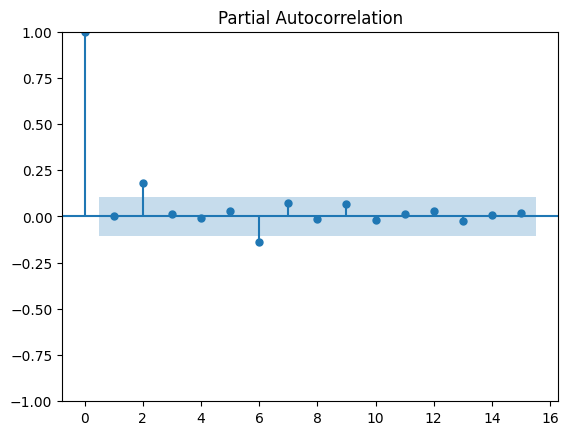

In [23]:
plot_pacf(df.summoner_win, lags=15, method = "ols");

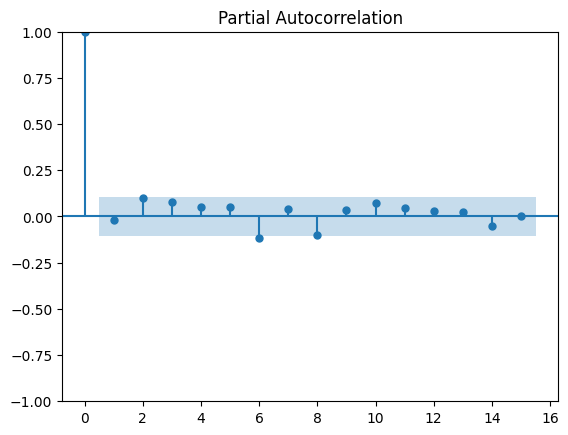

In [22]:
plot_pacf(df.summoner_predicted_win, lags=15, method = "ols");

We can therefore notice that for the first time series (outcome), we have significant correlations especially at lag 2 and 6. Contrary to our second time series (predicted_outcome), which does not have any self-correlations significantly higher than 0. 

So these results would be in the direction of random matchmaking, which does not try to accentuate the long series of wins and losses (predicted_outcome). But a potential psychological bias, linked to the player, which would tend to lengthen his winning and losing streaks.